<a href="https://colab.research.google.com/github/ananstr/brusup_git/blob/main/Challenge_Ana_Marta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##H0: There is a correlation between a country's GDP per capita and its CO2 emissions per capita.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get the relative file path
import os

current_directory = os.getcwd()

# Define the file name or sub-directory where your file is located
file_name = 'GDP_CO2_2020.csv'

# Get the relative path
relative_path = os.path.join(current_directory, file_name)

print("Relative Path:", relative_path)

Relative Path: /content/GDP_CO2_2020.csv


In [ ]:
#Import data
df = pd.read_csv("GDP_CO2_2020.csv")

In [ ]:
# Looking for number of rows and columns
print(df.shape)

(651, 5)


In [ ]:
# Checking out column names
df.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2020 [YR2020]'],
      dtype='object')

In [ ]:
#Replace ".." (WB's for NaN) with "NaN"
df = df.replace("..", np.nan)

#Show how many missing variable there are per row
missing_values_per_row = df.isnull().sum(axis=1)
print(missing_values_per_row)

0      0
1      0
2      0
3      0
4      0
      ..
646    1
647    1
648    0
649    0
650    0
Length: 651, dtype: int64


In [ ]:
rename_dict = {
    'Country Code' : 'iso',
    'Country Name' : 'Country',
    'Series Name' : 'Series',
    '2020 [YR2020]' : 'Value'

}

df.rename(columns=rename_dict, inplace=True)

#df.set_index('iso', inplace= True)

df

,Series,Series Code,Country,iso,Value
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,38972230
1,"Population, total",SP.POP.TOTL,Albania,ALB,2837849
2,"Population, total",SP.POP.TOTL,Algeria,DZA,43451666
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,46189
4,"Population, total",SP.POP.TOTL,Andorra,AND,77700
...,...,...,...,...,...
646,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,Virgin Islands (U.S.),VIR,NaN
647,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,West Bank and Gaza,PSE,NaN
648,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,"Yemen, Rep.",YEM,0.308514614308256
649,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,Zambia,ZMB,0.40190271250386


In [ ]:
df['Value'] = df['Value'].astype('float')
df_pivoted = df.pivot_table(index='Country', columns='Series', values='Value')
# print(pivoted_df.shape)
df_pivoted.sample(4)

Series,CO2 emissions (metric tons per capita),GDP per capita (current US$),"Population, total"
Country,,,
Iceland,3.947465,59023.566347,366463.0
Guinea,0.343646,1073.659339,13205153.0
Ecuador,1.957575,5450.433761,17588595.0
Iraq,3.842178,4250.742908,42556984.0


In [ ]:
df_pivoted.columns

Index(['CO2 emissions (metric tons per capita)',
       'GDP per capita (current US$)', 'Population, total'],
      dtype='object', name='Series')

In [ ]:
rename_dict = {
    'CO2 emissions (metric tons per capita)' : 'CO2',
    'GDP per capita (current US$)' : 'GDP',
    'Population, total' : 'pop'

}

df_pivoted.rename(columns=rename_dict, inplace=True)

#df.set_index('iso', inplace= True)

df_pivoted

Series,CO2,GDP,pop
Country,,,
Afghanistan,0.223479,512.055098,38972230.0
Albania,1.544550,5343.037704,2837849.0
Algeria,3.718223,3794.409524,43451666.0
American Samoa,NaN,15609.777220,46189.0
Andorra,5.777148,37207.221999,77700.0
...,...,...,...
Virgin Islands (U.S.),NaN,39411.045254,106290.0
West Bank and Gaza,NaN,3233.568638,4803269.0
"Yemen, Rep.",0.308515,626.309169,32284046.0


In [ ]:
df_pivoted.columns

Index(['CO2', 'GDP', 'pop'], dtype='object', name='Series')

In [ ]:
# grouped_df = df_pivoted.groupby(['Country'])
# grouped_df.head()

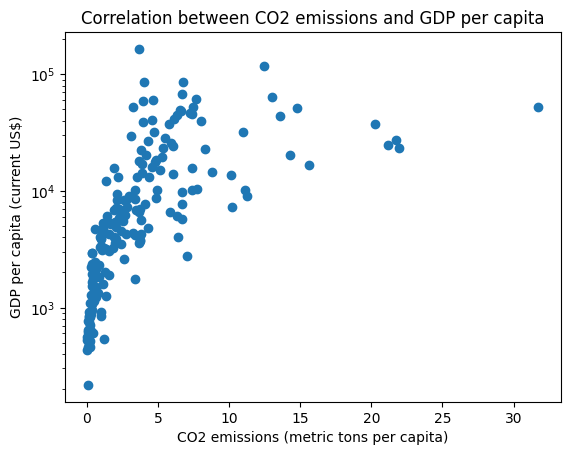

In [ ]:
x = df_pivoted['CO2']
y = df_pivoted['GDP']
plt.xlabel('CO2 emissions (metric tons per capita)')
plt.ylabel('GDP per capita (current US$)')
plt.yscale("log")
plt.title('Correlation between CO2 emissions and GDP per capita')
plt.scatter(x, y)

From the scatter plot above we conclude that in general  as CO2 emissions rise GDP per capita also tends to rise, this might be due to the fact that countries with higher GDP have more industrial activity contributing to higher CO2 emissions.
There is some outliers with very high GDP per capita but lower emissions this might be due to the fact that these richer countries use in cleaner more advanced techologies.
We will compute pearsons correlation coefficient next.